In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from pylab import rcParams
from collections import defaultdict

In [ ]:
with open('classes.txt', 'r') as f:
    lines = f.readlines()

animalNames = []
for line in lines:
    animalNames.append(line.replace('\n', '').split('\t')[-1])

with open('predicate-matrix-continuous.txt', 'r') as f:
    lines = f.readlines()

predMatrix = []
for line in lines:
    predMatrix.append([float(val.strip()) for val in line.split(' ') if val.strip() != ''])

predMatrix = np.array(predMatrix)
print(predMatrix)

[[-1.   -1.   -1.   ...  2.35  9.7   8.38]
 [39.25  1.39  0.   ... 58.64 20.14 11.39]
 [83.4  64.79  0.   ... 15.77 13.41 15.42]
 ...
 [63.57 43.1   0.   ... 35.95 28.26  5.  ]
 [55.31 55.46  0.   ...  5.04 18.89 72.99]
 [10.22 21.53 27.73 ...  3.96 14.05 37.98]]


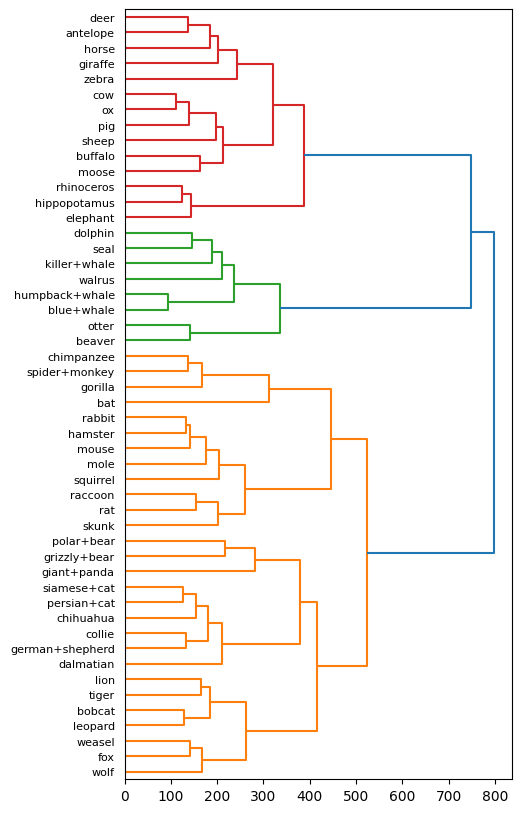

In [ ]:
rcParams['figure.figsize'] = 5, 10
tree = linkage(predMatrix, 'ward')
dn = dendrogram(tree, orientation='right', labels=[name for name in animalNames])
plt.show()

In [ ]:
clusters = fcluster(tree, t=10, criterion='maxclust')

clusterNameDict = defaultdict(list)
clusterVecDict = defaultdict(list)

for i in range(len(clusters)):
    clusterNameDict[clusters[i]].append(animalNames[i])
    clusterVecDict[clusters[i]].append(predMatrix[i])

for i in range(10):
    print("Cluster ", i+1, ":", clusterNameDict[i+1])

cost = 0;
for key, mat in clusterVecDict.items():
    vectors = np.array(mat)
    mu = np.mean(vectors, axis=0)
    cost += np.sum(np.linalg.norm(vectors - mu, axis=1)**2)

print("\nCost = ", cost)

Cluster  1 : ['tiger', 'leopard', 'fox', 'wolf', 'weasel', 'bobcat', 'lion']
Cluster  2 : ['dalmatian', 'persian+cat', 'german+shepherd', 'siamese+cat', 'chihuahua', 'collie']
Cluster  3 : ['grizzly+bear', 'giant+panda', 'polar+bear']
Cluster  4 : ['skunk', 'mole', 'hamster', 'squirrel', 'rabbit', 'rat', 'mouse', 'raccoon']
Cluster  5 : ['spider+monkey', 'gorilla', 'chimpanzee', 'bat']
Cluster  6 : ['beaver', 'otter']
Cluster  7 : ['killer+whale', 'blue+whale', 'humpback+whale', 'seal', 'walrus', 'dolphin']
Cluster  8 : ['hippopotamus', 'elephant', 'rhinoceros']
Cluster  9 : ['moose', 'ox', 'sheep', 'buffalo', 'pig', 'cow']
Cluster  10 : ['antelope', 'horse', 'giraffe', 'zebra', 'deer']

Cost =  679136.267267262


In [ ]:
kmeans = KMeans(n_clusters=10, init='random', n_init=10).fit(predMatrix)

clusterNameDict = defaultdict(list)

for i in range(len(kmeans.labels_)):
    clusterNameDict[kmeans.labels_[i]].append(animalNames[i])

for i in range(10):
    print("Cluster ", i+1, ":", clusterNameDict[i])

print("\nCost = ", kmeans.inertia_)

Cluster  1 : ['bat']
Cluster  2 : ['killer+whale', 'blue+whale', 'humpback+whale', 'seal', 'otter', 'walrus', 'dolphin']
Cluster  3 : ['beaver', 'persian+cat', 'siamese+cat', 'skunk', 'mole', 'squirrel', 'chihuahua', 'rat', 'weasel', 'mouse', 'collie', 'raccoon']
Cluster  4 : ['hamster', 'rabbit']
Cluster  5 : ['gorilla', 'giant+panda']
Cluster  6 : ['dalmatian']
Cluster  7 : ['antelope', 'horse', 'giraffe', 'zebra', 'deer']
Cluster  8 : ['spider+monkey', 'chimpanzee']
Cluster  9 : ['hippopotamus', 'moose', 'elephant', 'ox', 'sheep', 'rhinoceros', 'buffalo', 'pig', 'cow']
Cluster  10 : ['grizzly+bear', 'german+shepherd', 'tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion', 'polar+bear']

Cost =  758234.207986508
